# Bangla Handwritten Digits Classification
Using With Shallow Nural Network

*Dataset Source: [Bengali.ai](https://bengali.ai/)*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

### Loading and setting up the dataset

In [3]:
# Loading the dataset
X_train = pd.read_json('./dataset/train_images.json', ' ').to_numpy().T
Y_train = pd.read_json('./dataset/train_labels.json', ' ').to_numpy()
X_test = pd.read_json('./dataset/test_images.json', ' ').to_numpy().T
Y_test = pd.read_json('./dataset/test_labels.json', ' ').to_numpy()

# Setting up the label
ohe_y = OneHotEncoder()
Y_train = ohe_y.fit_transform(Y_train).toarray().T
Y_test = ohe_y.fit_transform(Y_test).toarray().T

# Checking the shape of the dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Normalizing the dataset
X_test = X_test / 255
X_train = X_train / 255

(784, 23824)
(10, 23824)
(784, 2653)
(10, 2653)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


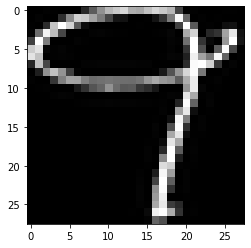

In [4]:
# Checking up some data
index = 334
temp_x_data = X_train.T[index].reshape(28, 28)
temp_y_data = Y_train.T[index]

plt.imshow(temp_x_data, cmap='gray')
print(temp_y_data)

In [5]:
# Getting shapes and sizes
m_train = Y_train.shape[1]
m_test = Y_test.shape[1]

# Size of input and output
n_x = X_test.shape[0]
n_y = Y_test.shape[0]

print('Number of training data: ' + str(m_train))
print('Number of testing data: ' + str(m_test))

print('Number of input params: ' + str(n_x))
print('Number of output params: ' + str(n_y))

Number of training data: 23824
Number of testing data: 2653
Number of input params: 784
Number of output params: 10


### Necessary functions for Nural Network

In [6]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Derivative of tanh function
def tanh_prime(x):
    return 1 - np.pow(np.tanh(x), 2)

### Now it's time for Neural net

In [7]:
# Initialize weights and biases
def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return params

### Forward Propagation

In [8]:
def forward_prop(X, params):
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache

In [9]:
params = init_params(n_x, 50, n_y)
A2, cache = forward_prop(X_train, params)

In [10]:
# Calculating the cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = (Y * np.log(A2)) + ((1 - Y) * np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    return cost

In [11]:
cost = compute_cost(A2, Y_train)
print(cost)

6.933304203366307


In [12]:
# The back propagation function
def back_prop(params, cache, X, Y):
    m = X.shape[1]
    
    W1 = params["W1"]
    W2 = params["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1- np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads

In [13]:
grads = back_prop(params, cache, X_train, Y_train)

In [14]:
# Use gradiants to update parameters
def update_params(params, grads, learning_rate=0.05):
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [16]:
# The model for the neural net
def nn_model(X, Y, n_h=100, n_iter=5000, learning_rate=0.05, print_cost=True):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    params = init_params(n_x, n_h, n_y)
    
    for i in range(0, n_iter):
        A2, cache = forward_prop(X, params)
        cost = compute_cost(A2, Y)
        grads = back_prop(params, cache, X, Y)
        params = update_params(params, grads, learning_rate)
        
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    return params

In [20]:
print("h=100, iter=10000, lr=0.1")
params2 = nn_model(X_train, Y_train, n_h=100, n_iter=10000, learning_rate=0.1)

h=100, iter=10000, lr=0.1
Cost after iteration 0: 6.927131
Cost after iteration 200: 0.920930
Cost after iteration 400: 0.571187
Cost after iteration 600: 0.465236
Cost after iteration 800: 0.406500
Cost after iteration 1000: 0.365864
Cost after iteration 1200: 0.334734
Cost after iteration 1400: 0.309470
Cost after iteration 1600: 0.288178
Cost after iteration 1800: 0.269753
Cost after iteration 2000: 0.253507
Cost after iteration 2200: 0.238991
Cost after iteration 2400: 0.225892
Cost after iteration 2600: 0.213981
Cost after iteration 2800: 0.203082
Cost after iteration 3000: 0.193057
Cost after iteration 3200: 0.183794
Cost after iteration 3400: 0.175202
Cost after iteration 3600: 0.167207
Cost after iteration 3800: 0.159746
Cost after iteration 4000: 0.152766
Cost after iteration 4200: 0.146220
Cost after iteration 4400: 0.140069
Cost after iteration 4600: 0.134278
Cost after iteration 4800: 0.128814
Cost after iteration 5000: 0.123651
Cost after iteration 5200: 0.118766
Cost afte

In [42]:
# Prediction
def predict(X, params):
    A2, cache = forward_prop(X, params)
    A2 = (A2 == np.max(A2, axis=0)) + np.zeros((10,1))
    return A2

Predicted:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Actual Value:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


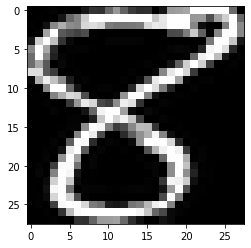

In [65]:
A2 = predict(X_test, params2)
index = 786
print("Predicted:")
print(A2.T[index])
print("Actual Value:")
print(Y_test.T[index])
plt.imshow(X_test.T[index].reshape(28,28), cmap='gray')

In [70]:
def test_accuracy(X, Y, params):
    P = predict(X, params)
    accuracy = np.equal(Y.T, P.T) + 0
    score = np.sum(accuracy) / (accuracy.shape[0]*accuracy.shape[1]) * 100
    return score

In [74]:
test_score = test_accuracy(X_test, Y_test, params2)
train_score = test_accuracy(X_train, Y_train, params2)

print("Score on train data: {}%".format(train_score))
print("Score on test data: {}%".format(test_score))

Score on train data: 99.94879113498992%
Score on test data: 99.32906143987938%


> The accuracy is too much accuracy. This souldn't be this much for this kind of shallow network. I might show it to some specialist to check if I did everything perfectly!